In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import pandas as pd
from genetic_stuff import *


In [7]:
target = Image.open('pickle.png').convert('RGBA')
# target = target.resize((500, 500))

# make a blank image for the text, initialized to transparent text color
environment = Image.new('RGBA', target.size, (255, 255, 255, 0))

In [285]:
np.asarray(environment).shape

(800, 605, 4)

In [209]:
d = Organism(6, environment, n_points=3)

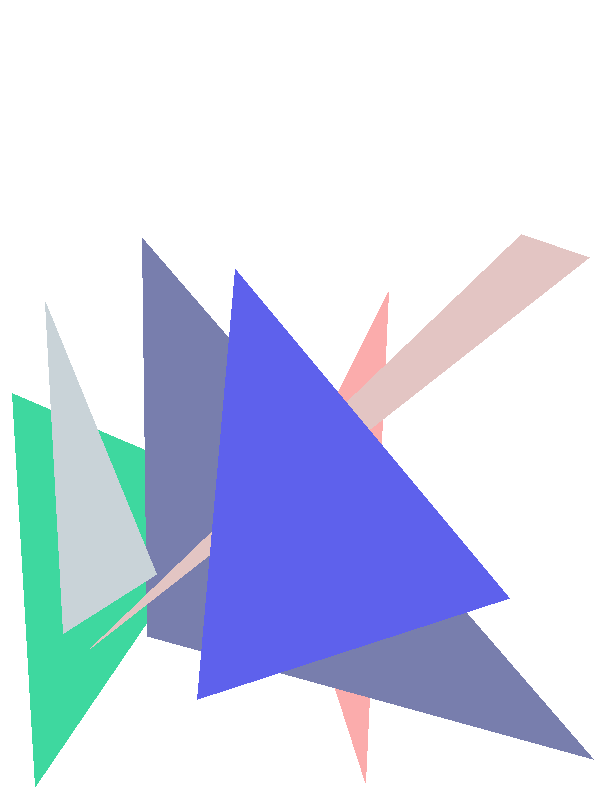

In [210]:
d.draw()

In [173]:
d.genes[0].coordinates = [(0, 0), (d.genes[0].width-10, 0), (d.genes[0].height-10, d.genes[0].height-10), (0, d.genes[0].height-10)]
d.genes[0].color = [0, 0, 0, 128]
d.genes[1].color = [255, 255, 255, 128]
d.genes[1].coordinates = [(0, 0), (d.genes[0].width-10, 0), (d.genes[0].height-10, d.genes[0].height-10), (0, d.genes[0].height-10)]

In [216]:
import cv2

In [230]:
np.array(d.genes[0].coordinates, dtype=np.int32)

array([[ 35, 786],
       [237, 489],
       [ 12, 393]])

In [257]:
color = tuple(map(int, d.genes[0].color))

In [258]:
color2 = tuple(list(color[:-1]) + [50])

In [259]:
color2

(2, 204, 130, 50)

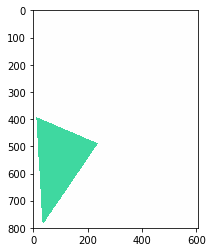

In [264]:
u = np.ones(np.asarray(target).shape).astype('int32')
cv2.fillPoly(u, [np.array(d.genes[0].coordinates, dtype=np.int32)], color)
plt.imshow(u)

In [275]:
type(u)

numpy.ndarray

In [311]:
canvas = np.ones(np.asarray(environment).shape)*255

for polygon in d.genes:
    pts = np.array(polygon.coordinates)
    # pts = pts.reshape((-1, 1, 2))
    col = tuple(map(int, polygon.color[:-1]))

    overlay = canvas
    output = canvas

    alpha = polygon.color[-1]/255
    print(alpha)
    cv2.fillPoly(overlay, [pts], col)

    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, canvas)

0.7607843137254902
0.38823529411764707
0.6274509803921569
1.0
0.3607843137254902
0.9372549019607843


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


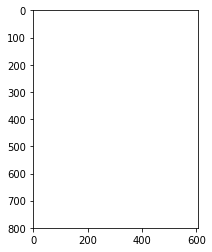

In [313]:
plt.imshow(canvas)

In [307]:
d.genes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


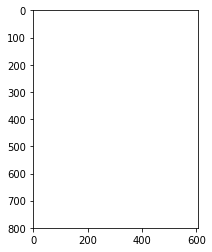

In [305]:
plt.imshow(canvas)

In [303]:
cv2.imshow('canvas' ,canvas)

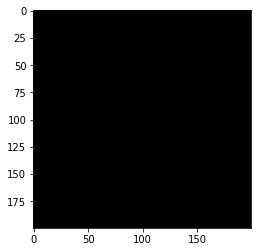

In [241]:
plt.imshow(np.append(np.zeros((200, 200, 3)), np.ones((200, 200, 1)), axis=2))

In [220]:
u.shape

(800, 605, 4)

In [174]:
d.genes[0].color

[0, 0, 0, 128]

In [175]:
d.genes[1].color

[255, 255, 255, 128]

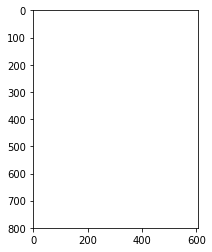

In [178]:
plt.imshow(np.asarray(environment)[..., :-1], alpha=1)

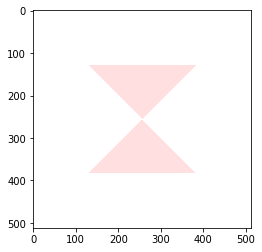

In [200]:
from PIL import Image
from PIL import ImageDraw
back = Image.new('RGBA', (512,512), (255,0,0,0))
poly = Image.new('RGBA', (512,512))
pdraw = ImageDraw.Draw(poly)
pdraw.polygon([(128,128),(384,384),(128,384),(384,128)],
              fill=(255,255,255,127),outline=(255,255,255,255))
back.paste(poly,mask=poly)
back.show()
plt.imshow(back)

In [208]:
y = np.asarray(back)
y[:, :, -1] = 255
plt.imshow(y)

ValueError: assignment destination is read-only

In [206]:
y[..., -1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

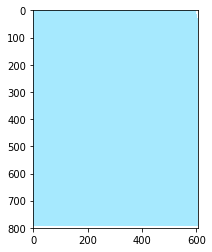

In [179]:
d.genes[1].show()

In [120]:
im = Image.new(COLOR_MODE, d.environment.size, (255, 255, 255, 255))


In [7]:
im = ImageDraw.Draw(environment)

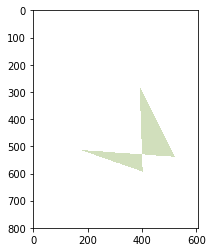

In [14]:
d.genes[0].show()

In [17]:
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

def optimizer(target, environment, pop_size, fitness_func, epochs):
#     root = Tk()
#     panel = Label(root)
    pop = Population(target, pop_size, environment, fitness_func)
    losses = []
    for i in tqdm_notebook(range(epochs)):
        pop.step()
        losses.append(pop.organisms[0].fitness)
        print(f'Iteration: {i} -- Best fitness: {pop.organisms[0].fitness} -- Worst fitness: {pop.organisms[-1].fitness}')
        
        if i % 10 == 0:
            plt.imshow(pop.best.draw())
            plt.show()
#             print(f'Loss: {pop.organisms[0].fitness}')
            
#             best_organism = pop.organisms.best
#             worst_organism = pop.organisms.organisms[-1]
#             best_phenotype = draw_phenotype(best_organism)
#             photo_image = ImageTk.PhotoImage(best_phenotype)
#             panel.configure(image=photo_image)
#             panel.image = photo_image
#             panel.pack(side="bottom", fill="both", expand="yes")

#         root.after(EVOLUTION_PERIOD_MS, self.update_panel)
#         root.mainloop()

        
    plt.plot(losses)

Iteration: 0 -- Best fitness: 21905.16796875 -- Worst fitness: 28281.021484375


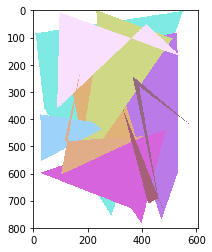

Iteration: 1 -- Best fitness: 22044.701171875 -- Worst fitness: 27027.376953125
Iteration: 2 -- Best fitness: 21145.787109375 -- Worst fitness: 25982.80078125
Iteration: 3 -- Best fitness: 21944.849609375 -- Worst fitness: 25201.6640625
Iteration: 4 -- Best fitness: 20588.623046875 -- Worst fitness: 23902.724609375
Iteration: 5 -- Best fitness: 21517.669921875 -- Worst fitness: 24258.146484375
Iteration: 6 -- Best fitness: 21818.76953125 -- Worst fitness: 23487.76953125
Iteration: 7 -- Best fitness: 21634.71484375 -- Worst fitness: 24874.716796875
Iteration: 8 -- Best fitness: 20509.16015625 -- Worst fitness: 25692.126953125
Iteration: 9 -- Best fitness: 20584.310546875 -- Worst fitness: 24936.7265625
Iteration: 10 -- Best fitness: 22339.337890625 -- Worst fitness: 24273.611328125


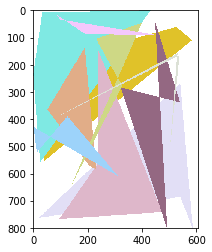

Iteration: 11 -- Best fitness: 22569.970703125 -- Worst fitness: 26009.755859375


KeyboardInterrupt: 

In [18]:
optimizer(target, environment, pop_size=100, fitness_func=mse, epochs=200)